## 데이터 로드
- 럭키백 이벤트 실습(로지스틱 회귀) 사용한 생선 데이터를 로드합니다: 'https://bit.ly/fish_csv'
- 품종(Species)을 타깃값으로, 나머지 컬럼을 입력값으로 사용합니다.
- 표준 점수로 전처리 합니다.
- 훈련/테스트 셋을 분할하지 않습니다.

In [31]:
import pandas as pd
df = pd.read_csv("https://bit.ly/fish_csv")
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [32]:
from sklearn.preprocessing import StandardScaler
target = df['Species'].copy()
data = df.copy().drop(columns=['Species'])
ss = StandardScaler()
data_scaled = ss.fit_transform(data)

## K-means 군집
- 입력 특성을 이용해 (무게, 길이, 대각선 길이, 높이, 너비) k-means 알고리즘으로 군집을 찾습니다.
- 군집의 개수 k는 2에서 9까지 변경해 가며 엘보우 방법으로 결정합니다. (random_state=42)
- 최적의 k로 군집을 찾은 후 군집 별 데이터 수에 대한 분포를 히스토그램으로 시각화합니다. 

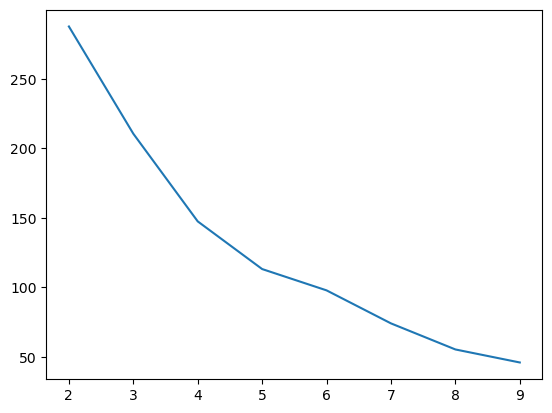

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 엘보우 방법 적용 (k: 2~9)
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.show()

In [34]:
# 4라고 판단하고 진행한다.
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(data_scaled)
km.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int32)

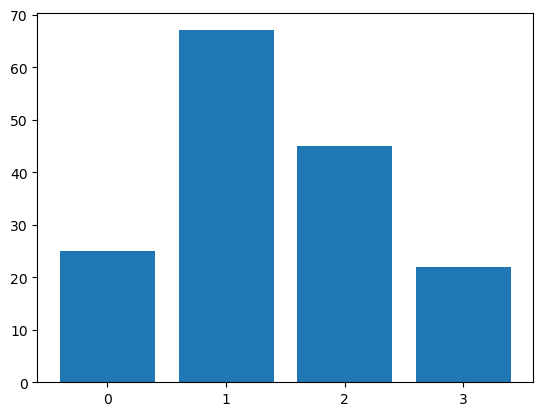

In [35]:
data["Cluster"] = km.labels_
cluster_counts = data["Cluster"].value_counts() # Cluster컬럼에 km label 저장

plt.bar(cluster_counts.index, cluster_counts.values) #x축:cluster, y축:counts
plt.xticks(cluster_counts.index) # cluster
plt.show()

- PCA를 이용해 입력 데이터를 2개의 차원으로 축소 후, 실제 생선 수인 7로 K 를 지정해 군집을 찾고 시각화합니다. 각 군집을 다른 색으로 나타낼 수 있도록 합니다.

In [36]:
from sklearn.decomposition import PCA
# 차원축소
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)
print(data_pca.shape)

(159, 2)


In [37]:
km = KMeans(n_clusters = 7, random_state=42)
km.fit(data_pca)
km.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 1, 1, 1, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int32)

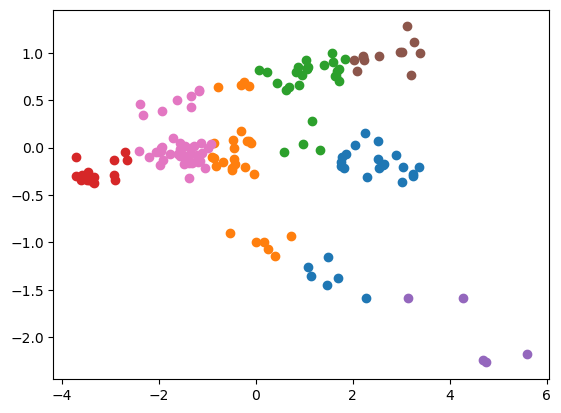

In [38]:
for label in range(0, 7):
    d = data_pca[km.labels_ == label] # label에 해당하는 d 선택
    plt.scatter(d[:,0], d[:,1])
plt.show()

- 군집 결과와 실제 생선 라벨의 관계를 조사하기 위해, 차원 축소 데이터로 타깃 라벨 정보를 시각화합니다. 각 라벨(다른 종류의 생선) 별로 다른 색으로 점이 그려질 수 있도록 합니다.

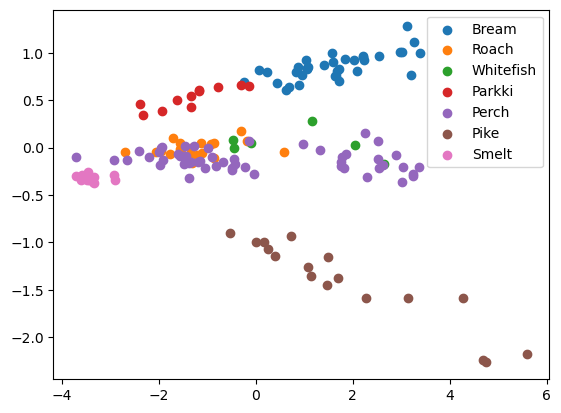

In [39]:
unique_labels = target.unique()

for label in unique_labels:
    idx = target == label
    plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=label)

plt.legend()
plt.show()

## 고찰
위 결과에 대해 고찰합니다.

엘보우 기법으로 최적의 K를 찾으려고 시도했을 때 뚜렷한 지점을 찾는 데에 어려움을 겪었다.  

PCA를 이용해 2개의 주성분을 남기도록 차원축소 후 군집을 찾고 시각화했을 때 군집 분리가 잘 된 것으로 보였다.   
그러나 군집 결과와 실제 생선 라벨 관계를 확인해봤을 때, **다른 레이블과 혼합**되어있는 것을 확인 가능하다. 결과적으로 군집화가 부정확하다.  
PCA가 가장 분산이 큰 주성분 2개만을 채택했으므로 일부 정보가 손실되었을 가능성이 있다고 판단했다.

차원축소를 통해 2차원 공간에서 데이터를 시각화하는 데에 유용하다는 점을 다시 한 번 확인 가능했다. 그러나 PCA만으로는 한계가 있다고 판단했고, 다른 부가적인 방법론이 추가된다면 더 좋은 결과를 도출해낼 수 있을 것이라고 생각한다.